In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [18]:
# сформируем скомпрометированные датасеты
with open('datasets.txt', 'r') as file:
    records = [line.rstrip().split(' ') for line in file]
# print(type(records))
for line in records:
    # print(line)
    for i in range(len(line)):
        if '.' in line[i]:
            line[i] = '99999.0'
    # print(line)
# for line in records:
    # print(line)
with open('datasets_bad_long.txt', 'w') as file:
    for line in records:
        s = ' '.join(line) + '\n'
        file.write(s)

# with open('datasets.txt', 'r') as file:
#     records = [line.rstrip().split(' ') for line in file]
# # print(type(records))
# for line in records:
#     # print(line)
#     for i in range(len(line)):
#         if '.' in line[i]:
#             line[i] = str(np.float32(np.random.uniform(0.0001, 0.02)))
#     # print(line)
# # for line in records:
#     # print(line)
# with open('datasets_bad_short.txt', 'w') as file:
#     for line in records:
#         s = ' '.join(line) + '\n'
#         file.write(s)

In [19]:
def get_X(datasets_file: str):
    with open(datasets_file, 'r') as file:
        records = [line.rstrip().split() for line in file]
    X = []
    for line in records:
        n = len(line)
        if n > 1:
            # print(line)
            for i in range(0, n - 2, 2):
                X.append(np.array([np.float32(x) for x in line[i:i + 2 + 1]]))
        else:
            x = line[0]
            X.append(np.array([np.float32(x), np.float32(np.random.uniform(1.0, 4.0)), np.float32(x)]))
    X = np.vstack(X)
    return X

In [20]:
X = get_X('datasets.txt')
X.shape

(40697, 3)

In [21]:
X = np.vstack((X, get_X('datasets_bad_long.txt')))
X.shape

(81394, 3)

In [22]:
# X = np.vstack((X, get_X('datasets_bad_short.txt')))
# X.shape

In [23]:
def norm_bad_datasemples(X):
    mask = (X[:, 1] == 99999.0)
    X[mask, 1] = np.float32(np.random.uniform(1.0, 4.0, size=np.sum(mask)))
    return X

X = norm_bad_datasemples(X)

In [24]:
def get_y(X):
    # Создание маски, которая проверяет наличие 99999.0 в строках X
    mask = (X[:, 1] > 1.0)
    # mask2 = (X[:, 1] < 0.05)
    # mask = mask1 | mask2

    # Создание y на основе маски
    y = mask.astype(int)

    # # Дополнительный вывод для проверки правильности соответствия
    # print("\nПроверка соответствия:")
    # for i in range(X.shape[0]):
    #     if y[i] == 0:
    #         print(f"Строка {i+1} в X: {X[i]} -> метка в y: {y[i]}")
    return np.array(y)

In [25]:
y = get_y(X)
y.shape

(81394,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [27]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(65115, 3) (65115,) (16279, 3) (16279,)


In [33]:
for i in range(30000, 30100):
    print(X_train[i], y_train[i])

[1.1600e+04 1.7103e-01 1.2100e+04] 0
[9.9000e+04 2.2797e-01 1.0600e+04] 0
[9.9000e+04 1.4601e-01 1.1000e+04] 0
[1.1400e+04 1.3002e-01 9.8000e+04] 0
[1.1500000e+04 1.8414782e+00 1.1500000e+04] 1
[9.9000e+04 1.9713e-01 1.0500e+04] 0
[9.9000000e+04 3.8092103e+00 1.2200000e+04] 1
[9.8000000e+04 3.5092368e+00 1.2100000e+04] 1
[1.1600000e+04 1.2748544e+00 1.0500000e+04] 1
[1.1000000e+04 3.2009377e+00 9.7000000e+04] 1
[1.1500000e+04 2.6765473e+00 1.1500000e+04] 1
[6.5505e+04 2.7105e-01 3.8000e+04] 0
[1.2100e+04 1.0848e-01 1.1600e+04] 0
[4.9000000e+04 1.5442575e+00 6.5506000e+04] 1
[1.0600000e+04 3.3710935e+00 1.1300000e+04] 1
[1.10e+04 1.40e-01 1.09e+04] 0
[1.0200e+04 1.5601e-01 1.1400e+04] 0
[1.0200e+04 4.0145e-01 1.1100e+04] 0
[4.600000e+04 3.899608e+00 4.800000e+04] 1
[1.0200000e+04 3.1499531e+00 1.1600000e+04] 1
[4.4000000e+04 1.4445708e+00 4.4000000e+04] 1
[1.1200000e+04 3.8716438e+00 1.0200000e+04] 1
[1.090000e+04 1.639865e+00 1.050000e+04] 1
[1.0400000e+04 1.6657796e+00 1.1500000e+04] 

In [28]:
# Создание модели
modls = []
a, b, c = 8, 12, 4
for i in range(10):
    print(i)
    model = models.Sequential([
        layers.Dense(8, input_shape=(3,), activation='relu'),
        # layers.Dropout(0.5),
        # layers.Dense(8, activation='relu'),
        # layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    # Компиляция модели
    model.compile(optimizer=optimizers.Adam(),
                  loss=losses.binary_crossentropy,
                  metrics=['accuracy'])

    early_stop = callbacks.EarlyStopping(
                                        monitor='val_accuracy',
                                        patience=5,
                                        restore_best_weights=True,
                                        mode='max',
                                        verbose=1
                                         )
    checkpoints = callbacks.ModelCheckpoint(
                                        filepath='./models_new/_{val_accuracy:.6f}.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1
                                        )
    # Обучение модели
    model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_split=0.3,
              callbacks=[early_stop, checkpoints],
              verbose=False)

    # Оценка модели
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    # print(f"i = {i}: Test Accuracy: {accuracy:.4f}")
    modls.append((accuracy, model))
# for i in range(len(modls)):
#     print(i, modls[i][0])

0

Epoch 1: val_accuracy improved from -inf to 0.55270, saving model to ./models_new\_0.552700.h5

Epoch 2: val_accuracy improved from 0.55270 to 0.75291, saving model to ./models_new\_0.752905.h5

Epoch 3: val_accuracy did not improve from 0.75291

Epoch 4: val_accuracy improved from 0.75291 to 0.80589, saving model to ./models_new\_0.805887.h5

Epoch 5: val_accuracy did not improve from 0.80589

Epoch 6: val_accuracy did not improve from 0.80589

Epoch 7: val_accuracy improved from 0.80589 to 0.87827, saving model to ./models_new\_0.878270.h5

Epoch 8: val_accuracy improved from 0.87827 to 0.89910, saving model to ./models_new\_0.899104.h5

Epoch 9: val_accuracy did not improve from 0.89910

Epoch 10: val_accuracy did not improve from 0.89910
1

Epoch 1: val_accuracy improved from -inf to 0.46552, saving model to ./models_new\_0.465523.h5

Epoch 2: val_accuracy improved from 0.46552 to 0.51165, saving model to ./models_new\_0.511646.h5

Epoch 3: val_accuracy improved from 0.51165 to 

In [29]:
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = model.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.0 -> 1
Prediction for 4.001: 1.0 -> 1
Prediction for 3.201: 1.0 -> 1
Prediction for 3.01: 1.0 -> 1
Prediction for 2.0001: 0.9999958872795105 -> 1
Prediction for 1.801: 0.9999361038208008 -> 1
Prediction for 1.5009: 0.9960223436355591 -> 1
Prediction for 1.5009: 0.9960223436355591 -> 1
Prediction for 1.4009: 0.9844160079956055 -> 1
Prediction for 1.3009: 0.9408585429191589 -> 1
Prediction for 1.2009: 0.800416111946106 -> 1
Prediction for 1.19: 0.775397002696991 -> 1
Prediction for 0.999: 0.1990281641483307 -> 0
Prediction for 0.501: 0.0002602745371405035 -> 0
Prediction for 0.301: 1.654448169574607e-05 -> 0
Prediction for 0.201: 4.173660272499546e-06 -> 0
Prediction for 0.1013: 1.0569950745775714e-06 -> 0
Prediction for 0.0901: 9.057209808815969e-07 -> 0
Prediction for 0.0501: 5.222000254434533e-07 -> 0
Prediction for 0.0101: 3.009925251262757e-07 -> 0
Prediction for 0.0081: 2.9268338153087825e-07 -> 0
Prediction for 0.0051: 2.8078505920348107e-07 -> 0
Prediction

In [30]:
model.save('smth_good.h5')

In [46]:
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 1.01, 10800]],
                    [[46000, 1.0, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.00000 -> 1
Prediction for 4.001: 1.00000 -> 1
Prediction for 3.201: 1.00000 -> 1
Prediction for 3.01: 1.00000 -> 1
Prediction for 2.0001: 1.00000 -> 1
Prediction for 1.801: 0.99994 -> 1
Prediction for 1.5009: 0.99602 -> 1
Prediction for 1.5009: 0.99602 -> 1
Prediction for 1.4009: 0.98442 -> 1
Prediction for 1.3009: 0.94086 -> 1
Prediction for 1.2009: 0.80042 -> 1
Prediction for 1.19: 0.77540 -> 1
Prediction for 1.01: 0.22417 -> 0
Prediction for 1.0: 0.20135 -> 0
Prediction for 0.999: 0.19903 -> 0
Prediction for 0.501: 0.00026 -> 0
Prediction for 0.301: 0.00002 -> 0
Prediction for 0.201: 0.00000 -> 0
Prediction for 0.1013: 0.00000 -> 0
Prediction for 0.0901: 0.00000 -> 0
Prediction for 0.0501: 0.00000 -> 0
Prediction for 0.0101: 0.00000 -> 0
Prediction for 0.0081: 0.00000 -> 0
Prediction for 0.0051: 0.00000 -> 0
Prediction for 0.0011: 0.00000 -> 0


In [42]:
loaded = models.load_model('./models_new/_0.987766.h5')

early_stop = callbacks.EarlyStopping(
                                        monitor='val_accuracy',
                                        patience=5,
                                        restore_best_weights=True,
                                        mode='max',
                                        verbose=1
                                        )

checkpoints = callbacks.ModelCheckpoint(
                                        filepath='./models_new/_{val_accuracy:.6f}.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1
                                        )

loaded.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_split=0.3,
              callbacks=[early_stop, checkpoints],
              verbose=True)

loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"i = {i}: Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1413/1425 [============================>.] - ETA: 0s - loss: 22.0408 - accuracy: 0.8191
Epoch 1: val_accuracy improved from -inf to 0.95270, saving model to ./models_new\_0.952700.h5
1425/1425 [==============================] - 3s 2ms/step - loss: 21.8691 - accuracy: 0.8201 - val_loss: 3.4790 - val_accuracy: 0.9527
Epoch 2/10
1411/1425 [============================>.] - ETA: 0s - loss: 19.1554 - accuracy: 0.8430
Epoch 2: val_accuracy did not improve from 0.95270
1425/1425 [==============================] - 3s 2ms/step - loss: 18.9893 - accuracy: 0.8436 - val_loss: 3.4169 - val_accuracy: 0.9186
Epoch 3/10
1412/1425 [============================>.] - ETA: 0s - loss: 20.6923 - accuracy: 0.8591
Epoch 3: val_accuracy did not improve from 0.95270
1425/1425 [==============================] - 3s 2ms/step - loss: 20.5137 - accuracy: 0.8601 - val_loss: 3.0370 - val_accuracy: 0.9396
Epoch 4/10
1397/1425 [============================>.] - ETA: 0s - loss: 12.6675 - accuracy: 0.8690
Epoch

In [15]:
model.save('model.h5')

In [53]:
loaded = models.load_model('./models/_0.993771.h5')

In [52]:
loaded = models.load_model('./models/_0.987930.h5')

early_stop = callbacks.EarlyStopping(
                                        monitor='val_accuracy',
                                        patience=5,
                                        restore_best_weights=True,
                                        mode='max',
                                        verbose=1
                                        )

checkpoints = callbacks.ModelCheckpoint(
                                        filepath='./models/_{val_accuracy:.6f}.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1
                                        )

loaded.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_split=0.3,
              callbacks=[early_stop, checkpoints],
              verbose=True)

loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"i = {i}: Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1311/1311 [==============================] - ETA: 0s - loss: 8.6434 - accuracy: 0.8488
Epoch 1: val_accuracy improved from -inf to 0.97614, saving model to ./models\_0.976139.h5
1311/1311 [==============================] - 3s 2ms/step - loss: 8.6434 - accuracy: 0.8488 - val_loss: 0.1865 - val_accuracy: 0.9761
Epoch 2/10
1280/1311 [============================>.] - ETA: 0s - loss: 25.1228 - accuracy: 0.8304
Epoch 2: val_accuracy did not improve from 0.97614
1311/1311 [==============================] - 2s 2ms/step - loss: 24.5635 - accuracy: 0.8322 - val_loss: 1.5222 - val_accuracy: 0.9010
Epoch 3/10
1304/1311 [============================>.] - ETA: 0s - loss: 15.7450 - accuracy: 0.8480
Epoch 3: val_accuracy did not improve from 0.97614
1311/1311 [==============================] - 2s 2ms/step - loss: 15.7166 - accuracy: 0.8475 - val_loss: 8.5398 - val_accuracy: 0.6988
Epoch 4/10
1287/1311 [============================>.] - ETA: 0s - loss: 19.5090 - accuracy: 0.8422
Epoch 4: va

In [55]:
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.00000 -> 1
Prediction for 4.001: 1.00000 -> 1
Prediction for 3.201: 1.00000 -> 1
Prediction for 3.01: 1.00000 -> 1
Prediction for 2.0001: 0.99997 -> 1
Prediction for 1.801: 0.99618 -> 1
Prediction for 1.5009: 0.13442 -> 0
Prediction for 1.5009: 0.13442 -> 0
Prediction for 1.4009: 0.01292 -> 0
Prediction for 1.3009: 0.00110 -> 0
Prediction for 1.2009: 0.00009 -> 0
Prediction for 1.19: 0.00007 -> 0
Prediction for 0.999: 0.00000 -> 0
Prediction for 0.501: 0.00000 -> 0
Prediction for 0.301: 0.00000 -> 0
Prediction for 0.201: 0.00000 -> 0
Prediction for 0.1013: 0.00000 -> 0
Prediction for 0.0901: 0.00000 -> 0
Prediction for 0.0501: 0.00000 -> 0
Prediction for 0.0101: 0.00000 -> 0
Prediction for 0.0081: 0.00000 -> 0
Prediction for 0.0051: 0.00000 -> 0
Prediction for 0.0011: 0.00000 -> 0


In [3]:

from tensorflow.keras import models
import numpy as np

loaded = models.load_model('./models/_0.993771.h5')
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction} -> {round(prediction[0][0])}")

Prediction for 4.501: [[1.]] -> 1
Prediction for 4.001: [[1.]] -> 1
Prediction for 3.201: [[1.]] -> 1
Prediction for 3.01: [[1.]] -> 1
Prediction for 2.0001: [[0.9999722]] -> 1
Prediction for 1.801: [[0.9961847]] -> 1
Prediction for 1.5009: [[0.13441792]] -> 0
Prediction for 1.5009: [[0.13441792]] -> 0
Prediction for 1.4009: [[0.01291617]] -> 0
Prediction for 1.3009: [[0.00110136]] -> 0
Prediction for 1.2009: [[9.280609e-05]] -> 0
Prediction for 1.19: [[7.082638e-05]] -> 0
Prediction for 0.999: [[6.275357e-07]] -> 0
Prediction for 0.501: [[2.793794e-12]] -> 0
Prediction for 0.301: [[1.9816692e-14]] -> 0
Prediction for 0.201: [[1.6673479e-15]] -> 0
Prediction for 0.1013: [[1.4147082e-16]] -> 0
Prediction for 0.0901: [[1.0726955e-16]] -> 0
Prediction for 0.0501: [[3.9924385e-17]] -> 0
Prediction for 0.0101: [[1.4808656e-17]] -> 0
Prediction for 0.0081: [[1.4101547e-17]] -> 0
Prediction for 0.0051: [[1.3100537e-17]] -> 0
Prediction for 0.0011: [[1.1855954e-17]] -> 0


In [47]:
loaded = models.load_model('best_model_3-8-1-0.9736.h5')

In [48]:
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.00000 -> 1
Prediction for 4.001: 1.00000 -> 1
Prediction for 3.201: 0.99987 -> 1
Prediction for 3.01: 0.99968 -> 1
Prediction for 2.0001: 0.96603 -> 1
Prediction for 1.801: 0.91831 -> 1
Prediction for 1.5009: 0.73530 -> 1
Prediction for 1.5009: 0.73530 -> 1
Prediction for 1.4009: 0.63550 -> 1
Prediction for 1.3009: 0.52274 -> 1
Prediction for 1.2009: 0.40762 -> 0
Prediction for 1.19: 0.39540 -> 0
Prediction for 0.999: 0.21157 -> 0
Prediction for 0.501: 0.02572 -> 0
Prediction for 0.301: 0.01030 -> 0
Prediction for 0.201: 0.00649 -> 0
Prediction for 0.1013: 0.00409 -> 0
Prediction for 0.0901: 0.00388 -> 0
Prediction for 0.0501: 0.00322 -> 0
Prediction for 0.0101: 0.00268 -> 0
Prediction for 0.0081: 0.00265 -> 0
Prediction for 0.0051: 0.00262 -> 0
Prediction for 0.0011: 0.00257 -> 0


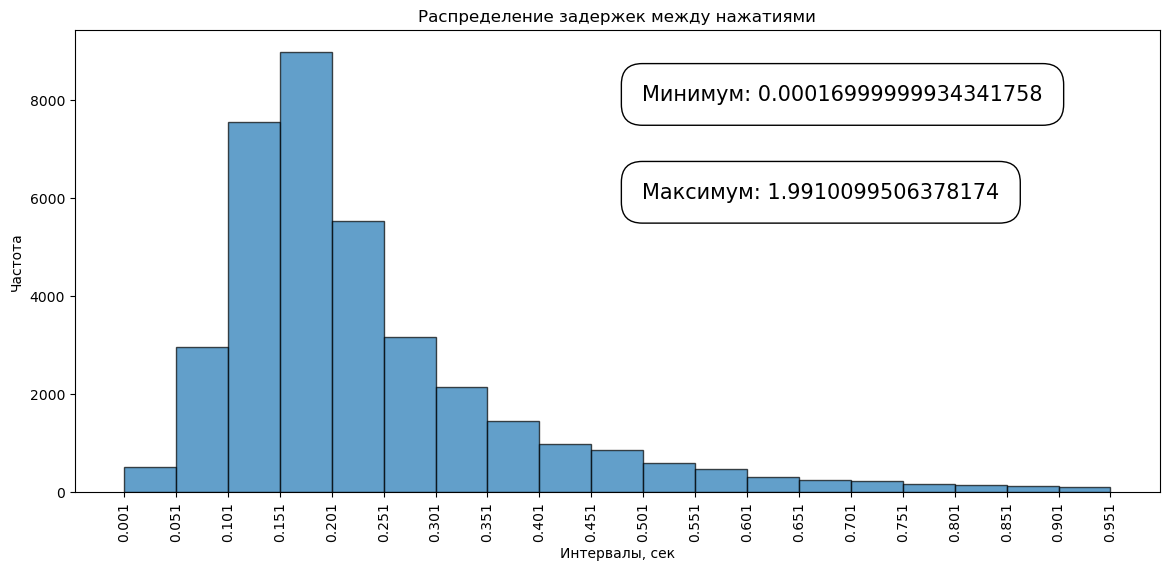

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных - замените на ваши данные
data = get_X('datasets.txt')[:, 1]
mask = data != 99999.0
data = data[mask]

# Определение интервалов
bins = np.arange(0.001, 1.0, 0.05)

# Построение гистограммы
hist, bin_edges = np.histogram(data, bins=bins)

# Вывод интервалов и соответствующих подсчетов
# for i in range(len(hist)):
#     print(f"От {bin_edges[i]} до {bin_edges[i+1]}: {hist[i]}")

# Построение графика
plt.figure(figsize=(14, 6))

plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Интервалы, сек')
plt.ylabel('Частота')
plt.title('Распределение задержек между нажатиями')

# plt.xticks(bins)
plt.xticks(bins, rotation=90)  # Установка меток оси X и их поворот на 90 градусов для лучшей читаемости
# plt.grid(axis='x', linestyle='--')  # Добавление сетки по оси X для лучшей визуализации

# Добавление рамки с минимальным и максимальным значениями
# Добавление рамки с минимальным и максимальным значениями
# print(data.min(), data.max())
plt.text(0.5, 8000, f"Минимум: {data.min()}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(0.5, 6000, f"Максимум: {data.max()}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()
